In [2]:
#import user modules
import helper_functions as hfun
import config as cf
import thouless_times as thouless
import importlib
importlib.reload(thouless)
importlib.reload(hfun)
importlib.reload(cf)
from os.path import exists

#--- importet in user module
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
import os

#--- other modules
import numpy as np
import itertools
from scipy.signal import savgol_filter
import seaborn as sns
import pandas as pd
import math
import random
import imageio
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
#plt.style.use(['science','ieee','no-latex'])

# get all the colors
import matplotlib.colors as mcolors

print(cf.base_directory)

../results/Ising/disorder/PBC/


In [52]:
L = 14
w = 0.3
site = 1

def name_loc(L, w, site):
    return cf.base_directory + "ResponseFunction/j=%d/SigmaX_j=%d_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(site, site, L, 1.0, 0.0, 0.0, 0.0, 0.8, w)

def name_ext(L, w):
    return cf.base_directory + "TESTS/SigmaX_ext_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, 1.0, 0.0, 0.0, 0.0, 0.8, w)


def name_av(L, w):
    return cf.base_directory + "ResponseFunction/EXTENSIVE/SigmaX_L=%d,J=%.2f,J0=%.2f,g=%.2f,g0=%.2f,h=%.2f,w=%.2f.dat"%(L, 1.0, 0.0, 0.0, 0.0, 0.8, w)


def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

(0.5, 8.0)

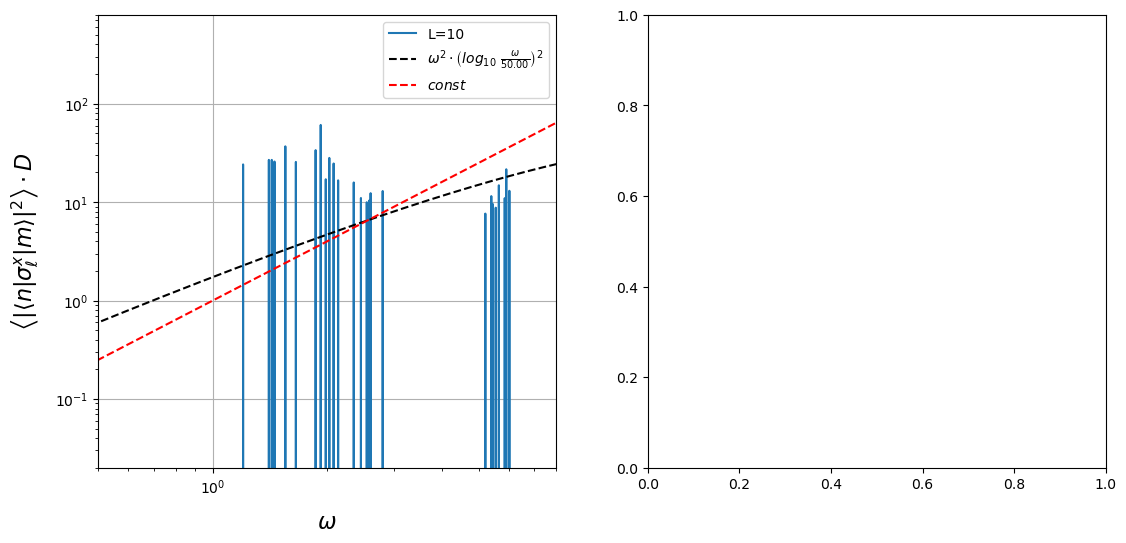

In [51]:
fig, (ax1, ax2) = plt.subplots( nrows=1, ncols=2, figsize=(13,6), dpi = 100)

for Lx in range(10, 15):
    if exists(name_av(Lx, w)):
        spec_fun = np.array(np.loadtxt(name_av(Lx, w), unpack=True))
        x = spec_fun[0]
        y = spec_fun[1]
        p = ax1.plot(x, (y) * 2**Lx, label="L=%d"%(Lx))

b=50.0; ax1.plot(x, 6.e-1 * x**2 * (np.log10(x/b))**2,ls='--', color='black', label=r"$\omega^2\cdot\left(log_{10}\ \frac{\omega}{%.2f}\right)^2$"%b)
ax1.plot(x, 1e0 * x**2,ls='--', color='red', label=r"$const$")

ax1.grid()
ax1.legend()
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlabel(r"$\omega$", rotation=0, fontsize=16, labelpad=10)
ax1.set_ylabel(r"$\left\langle\left|\langle n|\sigma^x_\ell|m\rangle\right|^2\right\rangle \cdot D$", fontsize=16, labelpad=10)
ax1.set_ylim(2e-1, 8e0)
ax1.set_xlim(0.8 - w, 8e0)


(0.007, 8.0)

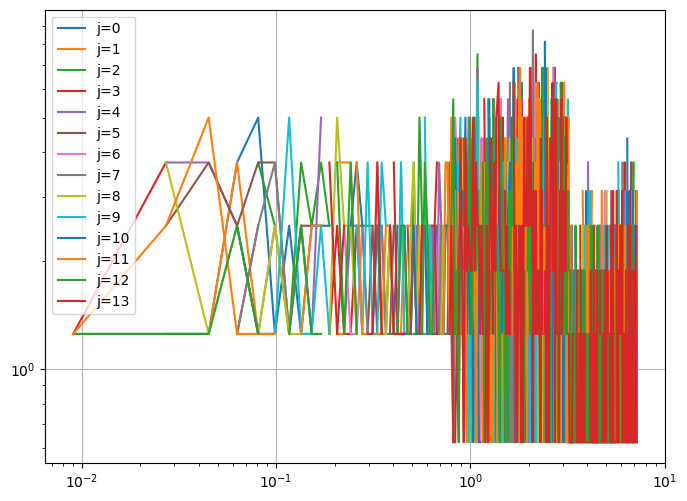

In [5]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 100)

for site in range(0, L):
    name = name_loc(L, w, site)
    if exists(name):
        spec_fun = np.loadtxt(name, unpack=True)
        x = np.array(spec_fun[0])
        y = np.array(zero_to_nan(spec_fun[1]))
        y = y * 2**L
        #y = savgol_filter(y, 7, 4)
        p = ax.plot(x, y, label="j=%d"%(site))

#ax.plot(x, 2.3e-2 * (10**x),ls='--', color='black', label=r"$\omega$")
#ax.plot(x, 2.3e-2 * (10**x)**2 * (x-1)**2,ls='--', color='red', label=r"$\omega^2\cdot\left(log_{10}\ \frac{\omega}{1.0}\right)^2$")

ax.grid()
ax.legend()
ax.set_yscale('log')
ax.set_xscale('log')
ax1.set_ylim(2e-1, 8e0)
ax1.set_xlim(7e-3, 8e0)